In [4]:

import numpy as np
import pandas as pd
df = pd.read_csv('AAPL.csv',header=0, parse_dates=[0], index_col=0)

In [5]:
# Xem data 
df

,Price
Date,
2018-01-02,43.06
2018-01-03,43.06
2018-01-04,43.26
2018-01-05,43.75
2018-01-08,43.59
...,...
2023-12-04,189.43
2023-12-05,193.42
2023-12-06,192.32


In [6]:
# 1. Các thư viện cần thiết
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [7]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:3

df = df[['Price']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.3 * len(df))


train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]


In [8]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [9]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)


In [10]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[216.8284569  216.96186593 217.09527496 217.22868399 217.36209302
 217.49550205 217.62891108 217.76232012 217.89572915 218.02913818
 218.16254721 218.29595624 218.42936527 218.5627743  218.69618333
 218.82959237 218.9630014  219.09641043 219.22981946 219.36322849
 219.49663752 219.63004655 219.76345558 219.89686462 220.03027365
 220.16368268 220.29709171 220.43050074 220.56390977 220.6973188 ]


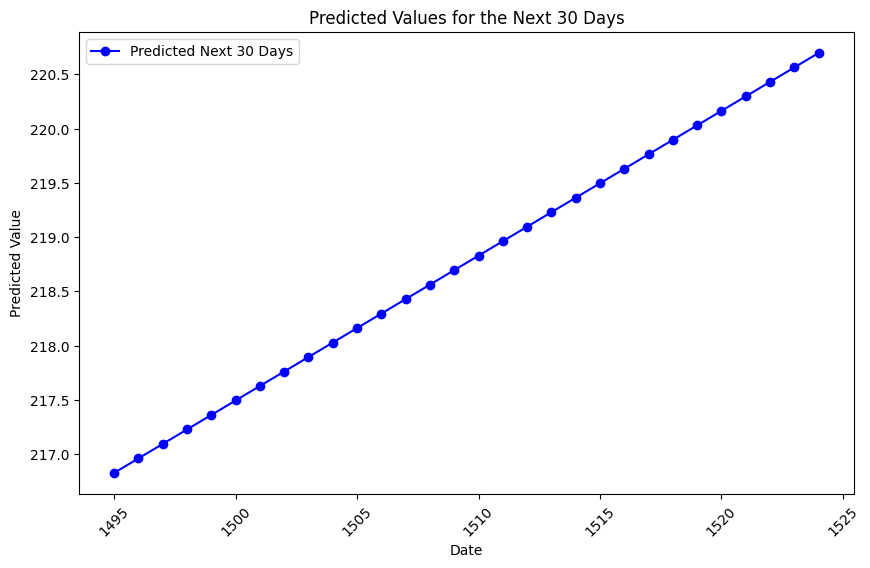

In [11]:

# Vẽ biểu đồ
plt.figure(figsize=(10, 6)) # Set the figure size
plt.plot(x_next_30_days, y_next_30_days, marker='o', color='b', label='Predicted Next 30 Days')

# Đặt tiêu đề và nhãn
plt.title('Predicted Values for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [12]:
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error
# 7. Đánh giá độ chính xác test bằng RMSE, MAE , MAPE
# RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', test_mape)
# MAE
test_mae = mean_absolute_error(y_test,y_pred)
print('Testing MAE:', test_mae)

Testing RMSE: 29.205658030340004
Testing MAPE: 0.16734855180845892
Testing MAE: 26.043966366158962


Testing RMSE: 29.205658030340004
Testing MAPE: 0.16734855180845892
Testing MAE: 26.043966366158962


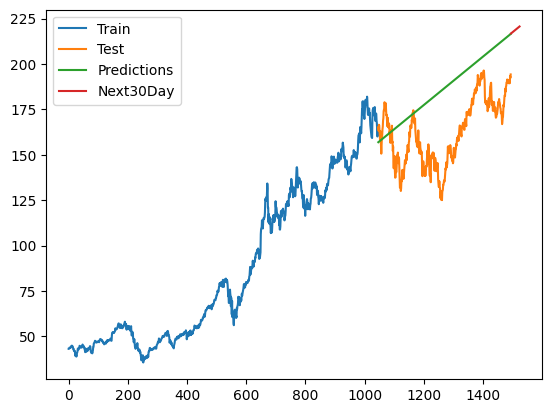

In [13]:
# 8. Tính RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', test_mape)
# MAE
test_mae = mean_absolute_error(y_test,y_pred)
print('Testing MAE:', test_mae)
# 9.Vẽ hình
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test','Predictions','Next30Day'])
plt.show()

In [14]:
test_data.index

RangeIndex(start=1046, stop=1494, step=1)